# An exploratory analysis of take-offs from German airports

# Table of contents
1. [Introduction](#introduction)
2. [Pre-processing](#preprocessing)
3. [Analysing the data](#analysing)
    1. [Finding the busiest airports as of 2023](#busiest-airports)
    2. [How has the total number of flights developed?](#developed)
    3. [How has the ratio of domestic to international flights changed?](#changes)
    4. [Finding the most international airports](#international)
    5. [Finding the most popular foreign destinations](#most-popular-foreign)
4. [Conclusion](#conclusion)
5. [References](#references)
6. [Airport codes](#codes)



## Introduction <a name="introduction"></a>
Planes are probably the mode of transport that comes to mind first when you think of international travel. However, in some countries, such as Germany, domestic air travel is a major commercial sector as well. As the world goes through crises such as COVID-19 and associated changes in demand and supply, the number of flights as well as the destinations offered can change drastically.
In this notebook, I want to look at the busiest airports in Germany, both in terms of the number of flights and the amount of foreign destinations, but also show how the number of domestic and international flights have changed over the years in general. Finally, I want to show off some of the more popular destinations as of 2023.

To investigate this interesting topic, I chose the table "Take-offs (Flight Stage): Germany, years, reporting airport, country of the next airport" (Code 46421-0002) from the Statistics of Air Transport Performance. You can find a link to the dataset in the references. 
The data set contains data about the number of take-offs from 27 major German airports along with the destination country. Data are reported per year. To preserve space in the plots, I chose to only display the international airport code of each airport. A full list of all airports can be found at the bottom of this notebook. Note that I will use the words "flight" and "take-off" interchangeably in this document, either way I am referring to outbound flights from the airport in question.

## Pre-processing <a name="preprocessing"></a>
We start by loading the CSV file containing our data and storing it as a pandas DataFrame called flights. You can find the details in main.py

In [53]:
from main import *

# Analysing the data <a name="analysing"></a>

## 1. Finding the busiest airports as of 2023 <a name="busiest-airports"></a>
Let us begin our journey by finding the busiest airports in the most recent data available to us, which is from 2023. First, we can simply select all the rows containing take-offs that took place that year. I made sure to remove the index and year from the airport Data Frame we will continue working with afterwards since we don't need those fields for further calculations.

In [54]:
flights_in_2023 = flights[flights["Year"] == 2023]
flights_in_2023

,Year,Country,F-BER,F-SXF,F-TXL,F-BRE,F-DTM,F-DRS,F-DUS,F-ERF,...,F-FMO,F-NRN,F-NUE,F-PAD,F-RLG,F-SCN,F-STR,F-GWT,F-ZQW,Total
2772,2023,"Afghanistan, Republic of",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2773,2023,Egypt,1134,<NA>,<NA>,44,4,120,1831,40,...,73,<NA>,436,78,1,7,615,<NA>,<NA>,11465
2774,2023,Albania,240,<NA>,<NA>,<NA>,332,<NA>,113,<NA>,...,<NA>,22,127,1,<NA>,<NA>,51,<NA>,<NA>,2958
2775,2023,Algeria,1,<NA>,<NA>,<NA>,<NA>,<NA>,2,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,660
2776,2023,United States Virgin Islands,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,2023,United States (southeast),46,<NA>,<NA>,2,<NA>,<NA>,75,<NA>,...,3,<NA>,3,<NA>,<NA>,<NA>,151,<NA>,<NA>,5816
2999,2023,United States (southwest),15,<NA>,<NA>,1,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,9,<NA>,<NA>,4831
3000,2023,Viet Nam,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,651
3001,2023,Central African Republic,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


You might be surprised at the amount of missing data. Don't worry! There are 231 different destinations listed in the dataset, so it is to be expected that every airport only offers flights to *some* of these. 
It is important to note as well that not all destinations are unique countries and territories - some larger countries are further split up, as we will see when we answer the last question. 

In [55]:
airports = flights_in_2023.iloc[:, 2:-1]  # remove year and country

To answer our question, we need to calculate the total number of flights per airport by calculating the sum over all possible destinations. Finally, we sort the values so we can select the top 10 busiest airports and display them as a simple bar plot.

In [56]:
number_of_flights = airports.sum(axis=0)  # ignore individual destinations

number_of_flights = number_of_flights.sort_values(ascending=False)
number_of_flights = number_of_flights.head(10)
number_of_flights

F-FRA    211762
F-MUC    147276
F-BER     83416
F-DUS     73337
F-CGN     53555
F-HAM     51917
F-STR     38996
F-LEJ     36940
F-HAJ     24604
F-NUE     16449
dtype: Int64

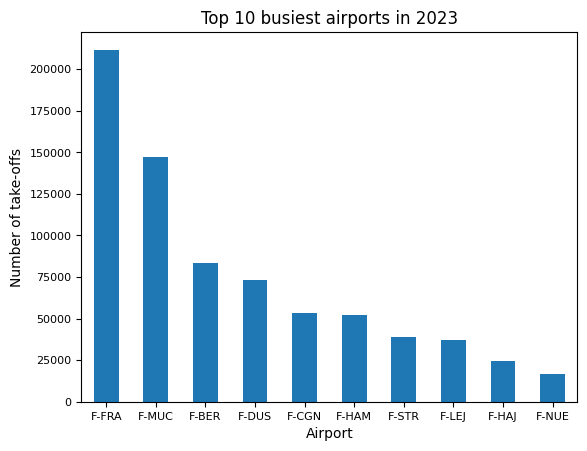

In [57]:
plt = number_of_flights.plot.bar(
    xlabel="Airport",
    ylabel="Number of take-offs",
    rot=0,
    fontsize=8,
    title="Top 10 busiest airports in 2023",
)

As you can see, the airports in Frankfurt, Munich and Berlin are incredibly busy, with well over 75,000 flights in 2023 each. Frankfurt is the busiest airport by far with over 210,000 flights in 2023.
However, notable logistics hubs such as Cologne (F-CGN) and Leipzig (F-LEJ) are also present, as well as airports of more regional importance sich as Hamburg, Stuttgart, Nürnberg and Düsseldorf. We will look at just how many international flights these airports handle (and thus how important they are internationally) in a later section of this document.
As a side note, the distribution also seems to roughly follow Zipf's law, although some airports see roughly equal amounts of air traffic, such as Cologne and Hamburg. 

## How has the number of flights developed over the past 10 years?  <a name="developed"></a>
As mentioned in the introduction, major events and crises can affect air travel as well. To get a glimpse into this, we will look at the five busiest airports from the ten we previously calculated and then display the number of take-offs as a line graph.
We start by calculating the number of flights per year per airport. To do this, we can use a handy function provided by pandas to group the flights by year, and then calculate the sum of flights per year per airport since we don't care about the specific destination in this section. 


In [58]:
flights_grouped_by_year = flights.groupby("Year")
flights_grouped_by_year = flights_grouped_by_year.sum()
flights_grouped_by_year

,Country,F-BER,F-SXF,F-TXL,F-BRE,F-DTM,F-DRS,F-DUS,F-ERF,F-FRA,...,F-FMO,F-NRN,F-NUE,F-PAD,F-RLG,F-SCN,F-STR,F-GWT,F-ZQW,Total
Year,,,,,,,,,,,,,,,,,,,,,
2011,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,33025,80649,19297,12429,13507,108369,4501,240585,...,13422,9216,26615,5225,9068,7500,62065,3463,3166,1085762
2012,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,32378,81874,18935,10925,12480,106132,4992,237902,...,9358,8501,24618,4619,8339,6059,60896,3182,2723,1057648
2013,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,29017,84310,18493,10979,10589,102690,4017,232894,...,6350,9373,23490,4414,8872,5628,58890,3206,2111,1014392
2014,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,31110,88127,18525,9669,11131,102640,3795,231164,...,7163,6719,21107,4227,5219,4496,57760,3092,1597,1006723
2015,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,34552,89284,17021,9634,10992,102286,3704,230432,...,6342,6591,20538,5406,0,4900,59836,3049,0,1013964
2016,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,44735,90203,16164,9437,10852,105672,3317,228246,...,9381,6390,20778,9346,3523,4516,58986,3945,0,1043478
2017,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,47223,84067,15032,10826,10707,107407,3154,234568,...,10923,6492,22744,10399,5526,4106,55787,0,0,1055763
2018,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,48984,90767,15479,12665,11039,106031,2870,252656,...,11034,5927,22971,12616,6088,4140,60777,0,0,1098990
2019,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,44349,94470,14703,13396,10214,109680,2955,253635,...,11374,4679,21205,11713,5384,3596,63683,0,0,1101878


You can easily see the number of flights per airport in the table provided above.

Now, it is time to display our data as a line graph. Thankfully, no further work is needed besides including the airports of interest in the arguments of the plot() function.

<Axes: title={'center': 'Number of take-offs from 2011 to 2023'}, xlabel='Year', ylabel='Number of take-offs'>

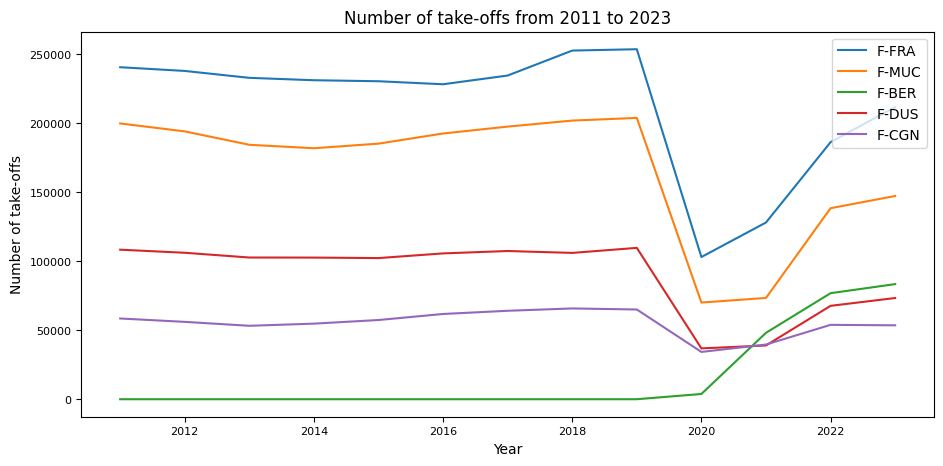

In [59]:
flights_grouped_by_year.plot(
    y=["F-FRA", "F-MUC", "F-BER", "F-DUS", "F-CGN"],
    title="Number of take-offs from 2011 to 2023",
    ylabel="Number of take-offs",
    figsize=(11, 5),
    x_compat=True,
    fontsize=8,
)

As you can see, the number of flights remained more or less steady from 2011 to 2019, with significant increases in the number of flights in Munich and Frankfurt in particular. There was a sharp drop in the number of flights in 2020 across all 5 airports, coinciding with the COVID-19 pandemic. Noticeably, the only airport not to suffer this fate is F-BER - the newly-built airport of Berlin, which only opened its doors in 2020 but experienced major growth right away. Overall, the number of flights still has not recovered to pre-pandemic levels though, and except for Frankfurt and Munich, one can expect the recovery in terms of flights to take quite a while.

## How has the ratio of domestic to international flights changed?  <a name="changes"></a>

Along with the number of flights overall, it is quite interesting to compare the amount of domestic and international flights. To answer this question, we will calculate the ratio of domestic vs international flights ourselves and then display it in a neat line graph.
Luckily, the number of total flights per destination per year is already provided to us in the table, so what we will have to do is sum up all the flights heading to countries other than Germany.

We start by first creating a copy of the flights Data Frame and then remove all the flights heading to destinations within Germany. This is done using a helper function provided in main.py.

In [60]:
international_flights = flights.copy()
international_flights = filter_flights(international_flights, domestic=False)
international_flights

,Year,Country,F-BER,F-SXF,F-TXL,F-BRE,F-DTM,F-DRS,F-DUS,F-ERF,...,F-FMO,F-NRN,F-NUE,F-PAD,F-RLG,F-SCN,F-STR,F-GWT,F-ZQW,Total
0,2011,"Afghanistan, Republic of",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2,<NA>,<NA>,791
1,2011,Egypt,<NA>,373,217,15,17,76,840,32,...,18,<NA>,428,84,8,<NA>,428,<NA>,4,6774
2,2011,Albania,<NA>,<NA>,2,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,606
3,2011,Algeria,<NA>,5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,3,2,<NA>,<NA>,<NA>,1,<NA>,<NA>,778
4,2011,United States Virgin Islands,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,2023,United States (southeast),46,<NA>,<NA>,2,<NA>,<NA>,75,<NA>,...,3,<NA>,3,<NA>,<NA>,<NA>,151,<NA>,<NA>,5816
2999,2023,United States (southwest),15,<NA>,<NA>,1,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,9,<NA>,<NA>,4831
3000,2023,Viet Nam,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,651
3001,2023,Central African Republic,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Since we don't care about the specific destination in this example, we merge all international flights by calculating the sum as we did in a previous section.

In [61]:
international_flights = international_flights.groupby("Year")
international_flights = international_flights.sum()
international_flights

,Country,F-BER,F-SXF,F-TXL,F-BRE,F-DTM,F-DRS,F-DUS,F-ERF,F-FRA,...,F-FMO,F-NRN,F-NUE,F-PAD,F-RLG,F-SCN,F-STR,F-GWT,F-ZQW,Total
Year,,,,,,,,,,,,,,,,,,,,,
2011,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,26079,45587,9771,6202,3673,79674,1232,203109,...,3686,8724,12220,3088,393,1771,34902,76,737,732488
2012,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,26415,48785,9383,6303,3420,78920,1033,202781,...,2356,8050,11503,2665,428,1768,33339,98,732,725094
2013,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,26876,51543,8910,6411,2731,76757,1245,197951,...,2370,8958,11630,2710,359,1807,31584,92,717,710120
2014,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,28573,53363,9828,6565,3437,77439,1380,197188,...,2663,6272,11269,2545,280,1694,31273,140,699,714372
2015,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,31492,54718,9208,6359,3147,78408,1465,196706,...,2307,6069,11156,2491,0,1971,34771,134,0,729089
2016,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,39771,55705,8597,6113,3026,81550,1439,194473,...,2035,5784,11524,2506,657,1690,34618,240,0,748300
2017,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,43294,51269,7440,6294,3437,84084,1665,200373,...,2448,5692,14285,2206,812,1654,35654,0,0,772541
2018,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,44235,54514,7195,7032,4114,82895,1705,216275,...,2673,5256,16048,2392,913,1442,38606,0,0,805544
2019,"Afghanistan, Republic ofEgyptAlbaniaAlgeriaUni...",0,39710,58950,6437,8397,3107,85911,1024,217842,...,2559,4019,14672,2187,482,1490,41787,0,0,805538


We use a similar approach to create a table containing domestic flights only, once again using our helper function, and then summing up the number of flights per year.

In [62]:
domestic_flights = flights.copy()
domestic_flights = filter_flights(flights, domestic=True)

domestic_flights = domestic_flights.groupby("Year")
domestic_flights = domestic_flights.sum()

domestic_flights

,Country,F-BER,F-SXF,F-TXL,F-BRE,F-DTM,F-DRS,F-DUS,F-ERF,F-FRA,...,F-FMO,F-NRN,F-NUE,F-PAD,F-RLG,F-SCN,F-STR,F-GWT,F-ZQW,Total
Year,,,,,,,,,,,,,,,,,,,,,
2011,Germany,0,6946,35062,9526,6227,9834,28695,3269,37476,...,9736,492,14395,2137,8675,5729,27163,3387,2429,353274
2012,Germany,0,5963,33089,9552,4622,9060,27212,3959,35121,...,7002,451,13115,1954,7911,4291,27557,3084,1991,332554
2013,Germany,0,2141,32767,9583,4568,7858,25933,2772,34943,...,3980,415,11860,1704,8513,3821,27306,3114,1394,304272
2014,Germany,0,2537,34764,8697,3104,7694,25201,2415,33976,...,4500,447,9838,1682,4939,2802,26487,2952,898,292351
2015,Germany,0,3060,34566,7813,3275,7845,23878,2239,33726,...,4035,522,9382,2915,0,2929,25065,2915,0,284875
2016,Germany,0,4964,34498,7567,3324,7826,24122,1878,33773,...,7346,606,9254,6840,2866,2826,24368,3705,0,295178
2017,Germany,0,3929,32798,7592,4532,7270,23323,1489,34195,...,8475,800,8459,8193,4714,2452,20133,0,0,283222
2018,Germany,0,4749,36253,8284,5633,6925,23136,1165,36381,...,8361,671,6923,10224,5175,2698,22171,0,0,293446
2019,Germany,0,4639,35520,8266,4999,7107,23769,1931,35793,...,8815,660,6533,9526,4902,2106,21896,0,0,296340


Now, we can finally calculate the ratio of domestic to international flights. To do this, we add the column containing the number of international flights to a new table containing the number of domestic flights, and then calculate the ratio by simply dividing these two columns element-wise. Finally, we store the result in yet another column (look for the results in the very last column of the table).

In [63]:
flights_expanded = domestic_flights.copy()
flights_expanded["International Total"] = international_flights["Total"].to_numpy()
flights_expanded["Ratio"] = (
    flights_expanded["Total"] / flights_expanded["International Total"]
)
flights_expanded

,Country,F-BER,F-SXF,F-TXL,F-BRE,F-DTM,F-DRS,F-DUS,F-ERF,F-FRA,...,F-NUE,F-PAD,F-RLG,F-SCN,F-STR,F-GWT,F-ZQW,Total,International Total,Ratio
Year,,,,,,,,,,,,,,,,,,,,,
2011,Germany,0,6946,35062,9526,6227,9834,28695,3269,37476,...,14395,2137,8675,5729,27163,3387,2429,353274,732488,0.482293
2012,Germany,0,5963,33089,9552,4622,9060,27212,3959,35121,...,13115,1954,7911,4291,27557,3084,1991,332554,725094,0.458636
2013,Germany,0,2141,32767,9583,4568,7858,25933,2772,34943,...,11860,1704,8513,3821,27306,3114,1394,304272,710120,0.42848
2014,Germany,0,2537,34764,8697,3104,7694,25201,2415,33976,...,9838,1682,4939,2802,26487,2952,898,292351,714372,0.409242
2015,Germany,0,3060,34566,7813,3275,7845,23878,2239,33726,...,9382,2915,0,2929,25065,2915,0,284875,729089,0.390727
2016,Germany,0,4964,34498,7567,3324,7826,24122,1878,33773,...,9254,6840,2866,2826,24368,3705,0,295178,748300,0.394465
2017,Germany,0,3929,32798,7592,4532,7270,23323,1489,34195,...,8459,8193,4714,2452,20133,0,0,283222,772541,0.366611
2018,Germany,0,4749,36253,8284,5633,6925,23136,1165,36381,...,6923,10224,5175,2698,22171,0,0,293446,805544,0.364283
2019,Germany,0,4639,35520,8266,4999,7107,23769,1931,35793,...,6533,9526,4902,2106,21896,0,0,296340,805538,0.367878


Finally, we can simply plot the ratio using a line graph.

<Axes: title={'center': 'Ratio of domestic to international flights from 2011 to 2023'}, xlabel='Year', ylabel='Ratio'>

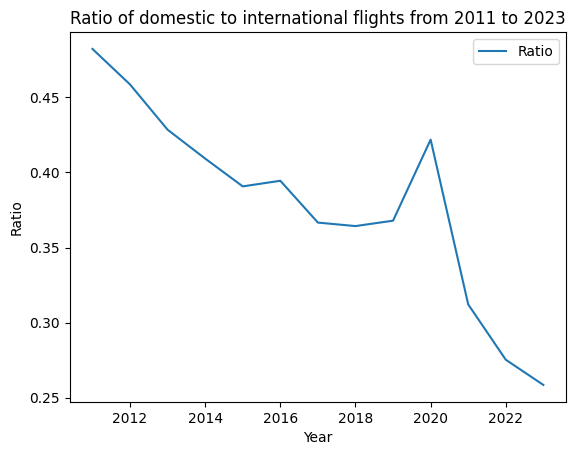

In [64]:
flights_expanded.plot(
    y="Ratio",
    ylabel="Ratio",
    title="Ratio of domestic to international flights from 2011 to 2023",
)

As you can see, domestic flights used to make up just about half of all flights in 2011. As the years went by, the ratio decreased in favour of international flights, meaning that domestic flights became less common. One can only speculate about the reasons for this development, but it is safe to assume that, among other things, domestic air travel became less socially acceptable compared to journeys by train or car. As a consequence of this development, international flights now make up the bulk of all flights. 

I would finally like to draw attention to the fact that there was a sharp spike in the number of domestic flights in 2020 - once again, this is likely a direct consequence of the COVID-19 pandemic, with travel restrictions making international travel more difficult than normal, and the remaining flights we saw in a previous section mostly being domestic flights. It is still remarkable that this increased ratio did not exceed levels of domestic travel seen in the pre-2013 years.

## Finding the most international airports <a name="international"></a>
Not all airports are born equal. Whereas some might be of importance to global trade and commerce and process passengers and freight from all over the world, others are only of national or even regional importance, especially when it comes to smaller airports.

In the previous section, we looked at the overall ratio of domestic to international flights. We will now use a similar approach to figure out what the most international airports are, meaning the airports with the largest share of international flights. For simplicity, we will only investigate the most current data available, namely from 2023.

We start by first selecting all the international and domestic flights in 2023 using a helper function provided in main.py. This results in two series, which we can concatenate into a single data frame. For the sake of readibility, we also rename that rather indescript column names into "Domestic" and "International" to signify domestic and international flights, respectively.

In [65]:
international_flights_in_2023 = get_flights_in_year(
    international_flights, 2023)
domestic_flights_in_2023 = get_flights_in_year(domestic_flights, 2023)

flights_in_2023 = pd.concat(
    [domestic_flights_in_2023, international_flights_in_2023], axis=1
)
flights_in_2023 = flights_in_2023.iloc[1:]
# remove first row since it is not needed for further calculations
flights_in_2023.columns = ["Domestic", "International"]
# Rename columns for clarity
flights_in_2023

,Domestic,International
F-BER,14988,68428
F-SXF,0,0
F-TXL,0,0
F-BRE,5467,4772
F-DTM,4892,8981
F-DRS,3599,2273
F-DUS,9574,63763
F-ERF,626,599
F-FRA,25974,185788
F-FDH,2500,1211


Now we can finally calculate the ratio for each airport. We'll look at the airports offering mostly domestics flights first.

Note that we remove all airports with no flights first to prevent division errors. Finally, we sort the values and then display them in a bar plot.

/var/folders/jx/bgc0brd50kl3rhwxqmlj7wch0000gn/T/ipykernel_54283/3576039236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_in_2023["Ratio"] = (


<Axes: title={'center': 'Ratio of domestic to international flights in 2023'}>

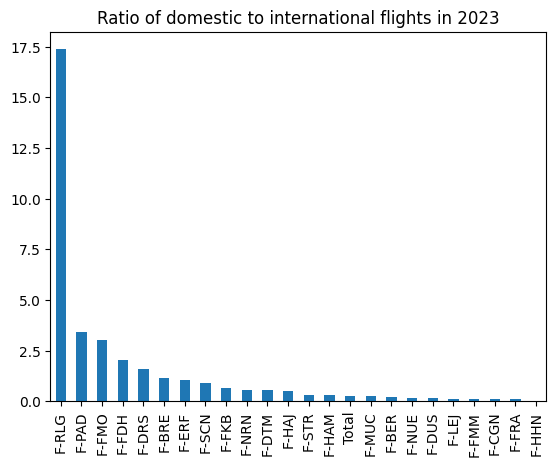

In [66]:
flights_in_2023 = flights_in_2023[flights_in_2023["International"] != 0]
# Remove inactive airports, meaning airports with no flights in 2023
flights_in_2023["Ratio"] = (
    flights_in_2023["Domestic"] / flights_in_2023["International"]
)
flights_in_2023 = flights_in_2023.sort_values(by=["Ratio"], ascending=False)
flights_in_2023["Ratio"].plot.bar(
    title="Ratio of domestic to international flights in 2023")

As you can see, the most domestic airports - with the least amount of international flights - are all rather small. Rostock-Laage is quite exceptional due to its incredibly high ratio of domestic flights. This is likely due to the fact that this airport is mostly used for charter flights to popular holiday destinations with very little regular air traffic otherwise. The same goes for smaller airports such as Paderborn or Münster/Osnabrück which are not particularly busy in general, although they still offer more international flights. 

Now that we've had a look at the more "domestic" airports, it is time to return to our original question of finding the most international airports - and to do this, we calculate the ratio the other way around and once again display the results using a bar plot after sorting them.

<Axes: title={'center': 'Ratio of international to domestic flights in 2023'}>

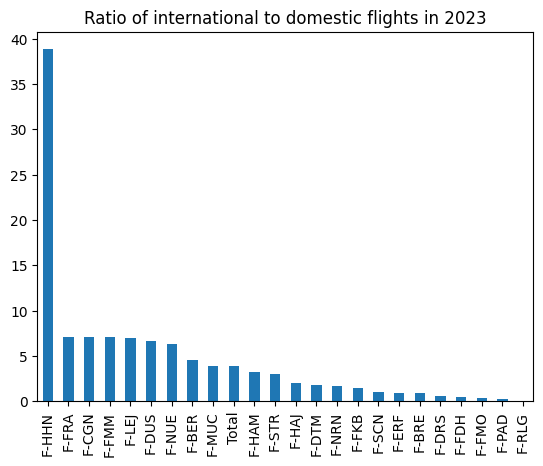

In [67]:
flights_in_2023["Ratio"] = (
    flights_in_2023["International"] / flights_in_2023["Domestic"]
)
flights_in_2023 = flights_in_2023.sort_values(by=["Ratio"], ascending=False)
flights_in_2023["Ratio"].plot.bar(
    title="Ratio of international to domestic flights in 2023")

Here, it is clear that Frankfurt-Hahn (F-HHN) is by far the most international airport in the dataset. A Wikipedia search tells us that there are no regular domestic flights other than ad-hoc charter flights, however, the airport is incredibly popular with low-cost and cargo airlines offering flights to international destinations.
Less surprisingly, to name just a few, Frankfurt, Cologne, Memmingen, Leipzig, Düsseldorf, Nurnberg also mostly focus on international air travel and less so on domestic flights.
Overall, it is clear that international air travel is dominant for most airports offering international flights, with the domestic market steadily shrinking. 

## Finding the most popular foreign destinations <a name="most-popular-foreign"></a>

Finally, let us look at another pressing question - where exactly is it that  all those international flights are heading? In this case, we will answer this question by considering the data for flights in 2023 once again. We will use a pie chart to visualise the top destinations.

As previously mentioned, it is important to consider here that some countries are split into several destinations. Nevertheless, let us continue by first filtering the flights using the helper function we've already used. Since we don't care about the individual airports in this example, we then group together all the destinations by country and calculate the sum, before finally sorting the values we calculated.

In [68]:
flights_in_2023 = flights[flights["Year"] == 2023]

flights_grouped_by_country = filter_flights(flights_in_2023, domestic=False
                                            
flights_grouped_by_country = flights_grouped_by_country.groupby("Country")
flights_grouped_by_country = flights_grouped_by_country.sum()
flights_grouped_by_country = flights_grouped_by_country.sort_values(
    by=["Total"], ascending=False
)

Now that we have our data, it is time to work on the pie chart. We first select the 10 most popular destinations, and then calculate the the sum of the remaining flights so we can display it in our pie chart. Due to pandas limitations, these operations result in two separate series, which we have to combine into a Date Frame so we can finally display them as a pie chart. The "autopct" option automatically calculates the percentages of each destination so they can be shown in the chart as well.

<Axes: >

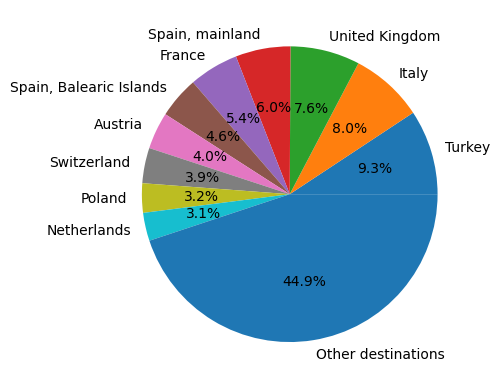

In [73]:
# Select the 10 most popular destinations
top_10 = flights_grouped_by_country.nlargest(10, "Total")

# Calculate the sum of the values of the remaining entries
remaining_sum = flights_grouped_by_country["Total"].sum(
) - top_10["Total"].sum()

# Create a new Data Frame with the top 10 entries and an entry for everything else
pie_data = pd.concat([top_10, pd.DataFrame(
    {"Total": [remaining_sum]}, index=["Other destinations"])])
pie_data.plot.pie(y="Total", ylabel="", legend=False, autopct="%1.1f%%")

As you can see, the destinations are quite varied, with the top 10 destinations still not including 44.9% of all flights. At first glance, Turkey, Italy, and the UK might seem like the most popular destinations, being popular with many tourists, however, one can see that the dataset differentiates between mainland Spain and the Balearic islands - together, they make up 10% of all flights, making Spain the single most popular destination for flights. The large share of flights to the Balearic Islands is likely due to the popularity of Mallorca with my tourists and low-cost airlines in particular.

A major trade partner and tourist destination, the US, is missing, which is likely both due to the relatively lower number of flights as well as the fragmentation of the US into several geographical regions in the dataset.

## Conclusion <a name="conclusion"></a>


## References <a name="references"></a>

Data is provided by the Federal Statistical Office. 

Dataset 46421-0002:
Take-offs (Flight Stage): Germany, years, reporting airport,
country of the next airport

You can find a link to the dataset here: https://www-genesis.destatis.de/genesis//online?operation=table&code=46421-0002

Some more information on Rostock-Laage: https://rostock-airport.de/fluege/flugplan/

Frankfurt-Hahn Airport: https://en.wikipedia.org/wiki/Frankfurt–Hahn_Airport

## List of airport codes <a name="codes"></a>

| Airport    | Code |
| -------- | ------- |
| F-BER | Berlin-Brandenburg |
|F-SXF |Berlin-Schönefeld (defunct)|
|F-TXL |Berlin-Tegel (defunct)|
|F-BRE |Bremen|
|F-DTM |Dortmund|
|F-DRS |Dresden|
|F-DUS |Düsseldorf|
|F-ERF |Erfurt|
|F-FRA |Frankfurt/Main|
|F-FDH |Friedrichshafen|
|F-HHN |Hahn|
|F-HAM |Hamburg|
|F-HAJ |Hannover|
|F-FKB |Karlsruhe|
|F-CGN |Köln/Bonn|
|F-LEJ |Leipzig/Halle|
|F-LBC |Lübeck|
|F-FMM |Memmingen|
|F-MUC |München|
|F-FMO |Münster/Osnabrück|
|F-NRN |Niederrhein|
|F-NUE |Nürnberg|
|F-PAD |Paderborn/Lippstadt|
|F-RLG |Rostock-Laage|
|F-SCN |Saarbrücken|
|F-STR |Stuttgart|
|F-GWT |Sylt-Westerland|
|F-ZQW |Zweibrücken|